# AI&데이터 마이닝 4일차 (2020.07.30)

# 05. 데이터 전처리
## Feature Scaling
### 개요
- 데이터의 각 속성의 값의 범위(feature scaling)의 차이가 클 때 scale이 큰 속성이 학습에 가장 큰 영향을 미치는 문제
- 정규화(nomalization) : (x - x최솟값) / (x최댓값 - x최솟값)
- 표준화(standardization) : (x - 평균) / 표준편차

In [3]:
import pandas as pd
df = pd.read_csv("./data/iris.csv")
df.index.name = 'record'

cols = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
print(df[cols])
df.describe().transpose()

        sepal.length  sepal.width  petal.length  petal.width
record                                                      
0                5.1          3.5           1.4          0.2
1                4.9          3.0           1.4          0.2
2                4.7          3.2           1.3          0.2
3                4.6          3.1           1.5          0.2
4                5.0          3.6           1.4          0.2
...              ...          ...           ...          ...
145              6.7          3.0           5.2          2.3
146              6.3          2.5           5.0          1.9
147              6.5          3.0           5.2          2.0
148              6.2          3.4           5.4          2.3
149              5.9          3.0           5.1          1.8

[150 rows x 4 columns]


,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# normalize the data and store in out scaled numpy array
out_scaled = scaler.fit_transform(df[cols])
print(out_scaled)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# standardize the data and store in out_scaled numpy array
out_scaled = scaler.fit_transform(df[cols])
print(out_scaled)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

## Example : improving matches from a dating site with kNN
### Hellen이 만났던 사람들은 다음 3가지 형태 중 하나
- People she didn't like
- People she liked in small doses
- People she liked in large doses

### Hellen은 평일에는 "People she liked in small doses"을 만나고 주말에는 "People she liked in large doses" 만나기를 바람
### Hellen의 요청
- 앞으로 만날 사람들을 3가지 유형으로 분류할 수 있도록 도와달라
- Date 사이트에는 없짐나 분류에 도움이 될 수 있는 데이터 추가 수집

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("./data/knnDatingTestSet2.tsv", sep='\t')
print(df.head())
print(df.describe())

   miles       game  icecream  level
0  40920   8.326976  0.953952      3
1  14488   7.153469  1.673904      2
2  26052   1.441871  0.805124      1
3  75136  13.147394  0.428964      1
4  38344   1.669788  0.134296      1
              miles         game     icecream        level
count   1000.000000  1000.000000  1000.000000  1000.000000
mean   33635.421000     6.559961     0.832073     1.985000
std    21957.006833     4.243618     0.497239     0.818196
min        0.000000     0.000000     0.001156     1.000000
25%    13796.000000     2.933963     0.408995     1.000000
50%    31669.000000     6.595204     0.809420     2.000000
75%    47716.250000    10.056500     1.272847     3.000000
max    91273.000000    20.919349     1.695517     3.000000


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'level'], df['level'], test_size=.33, random_state=100)

In [16]:
print(type(x_train))
print(x_train.head())

<class 'pandas.core.frame.DataFrame'>
     miles       game  icecream
3    75136  13.147394  0.428964
538  45944   9.213215  0.797743
709  42545   3.677287  0.244167
224  15987   2.037080  0.715243
370  51542   6.517133  0.402519


In [17]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)
print(classifier)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


In [18]:
print(classifier.score(x_test, y_test))

0.7696969696969697


## 정규화(MinMax)

In [19]:
# load module and instantiate scaler object
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# normalize the data and store in out_scaled numpy array
minmax_scaled = pd.DataFrame(scaler.fit_transform(df.loc[:, df.columns != 'level']), columns=['miles', 'games', 'icecreams'])
print(minmax_scaled)

        miles     games  icecreams
0    0.448325  0.398051   0.562334
1    0.158733  0.341955   0.987244
2    0.285429  0.068925   0.474496
3    0.823201  0.628480   0.252489
4    0.420102  0.079820   0.078578
..        ...       ...        ...
995  0.122106  0.163037   0.372224
996  0.754287  0.476818   0.394621
997  0.291159  0.509103   0.510795
998  0.527111  0.436655   0.429005
999  0.479408  0.376809   0.785718

[1000 rows x 3 columns]


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(minmax_scaled, df['level'], test_size=.33, random_state=100)
print(type(x_train))
print(x_train.head())

<class 'pandas.core.frame.DataFrame'>
        miles     games  icecreams
3    0.823201  0.628480   0.252489
538  0.503369  0.440416   0.470140
709  0.466129  0.175784   0.143423
224  0.175156  0.097378   0.421449
370  0.564701  0.311536   0.236882


In [24]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)
print(classifier)
print(classifier.score(x_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
0.9606060606060606


## 표준화(StandardScaler)

In [25]:
# load module and instantiate scaler object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# normalize the data and store in out_scaled numpy array
std_scaled = pd.DataFrame(scaler.fit_transform(df.loc[:, df.columns != 'level']), columns=['miles', 'games', 'icecreams'])
print(std_scaled)

        miles     games  icecreams
0    0.331932  0.416602   0.245234
1   -0.872478  0.139929   1.693857
2   -0.345549 -1.206671  -0.054224
3    1.891029  1.553092  -0.811100
4    0.214553 -1.152936  -1.404005
..        ...       ...        ...
995 -1.024806 -0.742505  -0.402895
996  1.604417  0.805083  -0.326537
997 -0.321718  0.964316   0.069526
998  0.659599  0.606995  -0.209316
999  0.461203  0.311833   1.006806

[1000 rows x 3 columns]


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(std_scaled, df['level'], test_size=.33, random_state=100)
print(type(x_train))
print(x_train.head())

<class 'pandas.core.frame.DataFrame'>
        miles     games  icecreams
3    1.891029  1.553092  -0.811100
538  0.560857  0.625547  -0.069076
709  0.405977 -0.679636  -1.182932
224 -0.804174 -1.066341  -0.235075
370  0.815937 -0.010097  -0.864310


In [27]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)
print(classifier)
print(classifier.score(x_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
0.9575757575757575


## 범주형 데이터 처리
### 데이터 마이닝 및 기계학습 방법들의 입력
- 거의 대부분 연속적인 변수와 정수형 입력을 처리하도록 설계됨
- 문자열이나 범주형 데이터는 입력으로 줄 수 없음
- 문자열이나 범주형 데이터를 연속적으로 데이터를 대리할 수 있는 형태로 인코딩해야 함

### 변수의 순서 여부
- 범주 / 순서형 : 신발 크기 (230, 270, 280, ...)
- 범주 / 명목형 : 티셔츠 색 (빨강, 파랑, 초록, ...)

### 인코딩 방법
- <font size = 5 color = "red">One Hot Encoding, Label Encoding, Ordinal Encoding,</font>
- Helmert Encoding, Binary Encoding, Frequency Encoding, Mean Encoding
- Weight of Evidence Encoding, Probability Ratio Encoding, Hashing Encoding
- Backward Difference Encoding, Leave One Out Encoding, James-Stein Encoding, Mestimator Encoding

### Ordinal Data Encoding
- 범주/순서형 데이터 : 티셔츠 사이즈, 신발 사이즈
- Scikit-learn의 OrdinalEncoder 이용해서 인코딩

In [53]:
df = pd.read_csv("./data/long_jump.csv")
df.set_index('Person', inplace=True)

In [54]:
cats = ['Jersey Size', 'Shoe Size']
df

,Age,Height,Weight,Training Hours/week,Jersey Color,Jersey Size,Shoe Size,Long Jump
Person,,,,,,,,
Thomas,12,57.5,73.4,6.5,blue,small,7,19.2
Jane,13,65.5,85.3,8.9,green,medium,10,25.1
Vaughn,17,71.9,125.9,1.1,green,large,12,14.3
Vera,14,65.3,100.5,7.9,red,medium,9,18.3
Vincent,18,70.1,110.7,10.5,blue,large,12,21.1
Lei-Ann,12,52.3,70.4,0.5,blue,small,7,10.6


In [55]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

out_enc = enc.fit_transform(df[cats])
print('identified categories:')
print(enc.categories_)
print('encoded data:')
print(out_enc)

identified categories:
[array(['large', 'medium', 'small'], dtype=object), array([ 7,  9, 10, 12], dtype=int64)]
encoded data:
[[2. 0.]
 [1. 2.]
 [0. 3.]
 [1. 1.]
 [0. 3.]
 [2. 0.]]


In [56]:
# overwrite categorical features in original dataframe
df[cats] = out_enc
df

,Age,Height,Weight,Training Hours/week,Jersey Color,Jersey Size,Shoe Size,Long Jump
Person,,,,,,,,
Thomas,12,57.5,73.4,6.5,blue,2.0,0.0,19.2
Jane,13,65.5,85.3,8.9,green,1.0,2.0,25.1
Vaughn,17,71.9,125.9,1.1,green,0.0,3.0,14.3
Vera,14,65.3,100.5,7.9,red,1.0,1.0,18.3
Vincent,18,70.1,110.7,10.5,blue,0.0,3.0,21.1
Lei-Ann,12,52.3,70.4,0.5,blue,2.0,0.0,10.6


In [57]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['b_small', 'a_medium', 'c_large']
temp_dict = {'b_small':0, 'a_medium':1, 'c_large':2}

df['temp_js'] = df['Jersey Size'].map(temp_dict)
df

,Age,Height,Weight,Training Hours/week,Jersey Color,Jersey Size,Shoe Size,Long Jump,temp_js
Person,,,,,,,,,
Thomas,12,57.5,73.4,6.5,blue,2.0,0.0,19.2,NaN
Jane,13,65.5,85.3,8.9,green,1.0,2.0,25.1,NaN
Vaughn,17,71.9,125.9,1.1,green,0.0,3.0,14.3,NaN
Vera,14,65.3,100.5,7.9,red,1.0,1.0,18.3,NaN
Vincent,18,70.1,110.7,10.5,blue,0.0,3.0,21.1,NaN
Lei-Ann,12,52.3,70.4,0.5,blue,2.0,0.0,10.6,NaN


## 범주형 데이터 처리
### One-hot Encoding
- 각 머신에 하나의 비트를 할당해서 상태를 표시하는 것으로 전자공학분야에서 사용되는 방법
- 이 방법을 통계학에 적용한 것
    - 각 속성별로 비트를 할당하고 어떤 속성 값이 나타나면 해당 비트만 1로 설정
- 중요. 많은 다운 스트림(Down Stream) 데이터 분석 방법에서 사용

- 단점
    - 새로운 속성 값에 대한 대응이 어려움
    - 예) Shoe Size 11인 레코드가 나타난다면?

In [58]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder (sparse=False)

out_enc = enc.fit_transform(df[cats])
new_cols = enc.get_feature_names(cats).tolist()
print(new_cols)

['Jersey Size_0.0', 'Jersey Size_1.0', 'Jersey Size_2.0', 'Shoe Size_0.0', 'Shoe Size_1.0', 'Shoe Size_2.0', 'Shoe Size_3.0']


C:\Users\dongi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [59]:
df_enc = pd.DataFrame(data = out_enc, columns = new_cols)
df_enc.index = df.index

df.drop(cats, axis=1, inplace=True)
df = pd.concat([df, df_enc], axis = 1)
print(df.columns)

Index(['Age', 'Height', 'Weight', 'Training Hours/week', 'Jersey Color',
       'Long Jump', 'temp_js', 'Jersey Size_0.0', 'Jersey Size_1.0',
       'Jersey Size_2.0', 'Shoe Size_0.0', 'Shoe Size_1.0', 'Shoe Size_2.0',
       'Shoe Size_3.0'],
      dtype='object')


### Label Encoding

In [60]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

out_enc = enc.fit_transform([1, 2, 5, 2, 4, 2, 5])
print(out_enc)

out_enc = enc.fit_transform(["blue", "red", "blue", "green", "red", "red"])
print(out_enc)

[0 1 3 1 2 1 3]
[0 2 0 1 2 2]


## High-dimensional 데이터 처리
### 차원의 저주 문제(Curse of dimensionality)
- 다다익선 : 속성(독립변수)이 많으면 많을 수록 좋다???
- 분석가들이 속성을 많이 확보하면 할수록 좋다고 생각 -> 차원이 크게 증가
- 차원이 증가하면 feature space가 기하급수적으로 증가하고 데이터의 분포가 real world를 반영하기에는 지나치게 sparse해질 수 있음 -> 속성이 증가하면 데이터 수도 같이 기하 급수적으로 증가해야 함

### 차원 축소(Dimension Reduction)
- 차원의 저주문제 해결
- 선택(Selection) : 최선의 속성만 선택, 나머지는 제거
- 변환(Transformation) : 하나 이상의 속성들을 조합해서 새로운 속성 생성

### 속성 선택
- 속성 필터링(Feature Filtering)
    - 중요한 속성 선택(Simple)
    - 중요한 정도를 어떻게 점수화??
        - 분산 임계 값(Variance Threshold)
        - 상관 계수(Correlation Coefficient)
- 래퍼 메소드(Wrapper Method)
    - Forward 방식 : 속성을 하나씩 추가하면서 예측을 수행하고 정확도에 각 속성이 미치는 정도(기여도)를 파악해 가면서 속성 선택
    - Backward 방식 : 반대로 전체 속성으로 예측을 수행하고 하나씩 제거하면서 기여도 평가

### 분산 임계 값
- 분산 임계 값을 설정하고 그 이하인 것은 제거

In [61]:
df = pd.read_csv("./data/iris.csv")
df.index.name = 'record'

cols = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

In [62]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()

selector.fit(df[cols])

print(selector.variances_)

[0.68112222 0.18871289 3.09550267 0.57713289]


In [63]:
# set threshold into selector object
selector.set_params(threshold=1.0)

# refit and transform, store output in out_sel
out_sel = selector.fit_transform(df[cols])

# check which features were chosen
print(selector.get_support())

[False False  True False]


In [64]:
# filter in the selected features
df_sel = df[cols].iloc[:, selector.get_support()]

# add labels to new dataframe and sanity check
df_sel = pd.concat([df_sel, df[['species']]], axis = 1)
print(df_sel.head())

        petal.length species
record                      
0                1.4  Setosa
1                1.4  Setosa
2                1.3  Setosa
3                1.5  Setosa
4                1.4  Setosa


### 상관 계수
- 가장 일반적인 피어슨(Pearson) 상관 계수 이용
    - -1에 가까운 값 : 음의 상관관계가 강함
    - 1에 가까운 값 : 양의 상관관계가 강함
    - 0에 가까운 값 : 관계가 매우 약함
- Pandas의 corr(), Seaborn의 heatmap 이용
- 상관계수에 따라 필터링 수행
    - 상관계수가 높은 속성 ?? or 상관계수가 낮은 속성 ??

In [65]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
df.index.name = 'record'

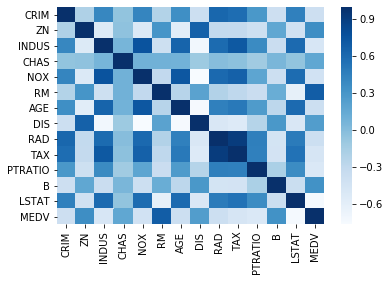

In [66]:
# find correlation with pandas ".corr()"
cor = df.corr()

# visualize with Seaborn heatmap, colormap = Blues
sns.heatmap(cor, annot=False, cmap=plt.cm.Blues)
plt.show()

In [67]:
# get correlation values with target variable
cor_target = abs(cor['MEDV'])
print(cor_target)

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


In [68]:
# choose features above threshold 0.6
selected_cols = cor_target[cor_target>0.6]
print("selected columns, correlation with target > 0.6")
print(selected_cols)
# filter in the selected features
df_sel = df[selected_cols.index]
print(df_sel.head())

selected columns, correlation with target > 0.6
RM       0.695360
LSTAT    0.737663
MEDV     1.000000
Name: MEDV, dtype: float64
           RM  LSTAT  MEDV
record                    
0       6.575   4.98  24.0
1       6.421   9.14  21.6
2       7.185   4.03  34.7
3       6.998   2.94  33.4
4       7.147   5.33  36.2


### 래퍼 메소드
- Scikit Learn의 RFE(Recursive Feature Elimination) 이용
    - 속성을 하나씩 추가/삭제하면서 예측을 수행하고 정확도를 평가하는 과정을 자동화한 방법
    - 예측에 사용하는 기계학습 알고리즘은 선택 가능
- 예측을 위한 기계학습 알고리즘 : Random Forest, Linear Regression, SVM(Support Vector Machine)

In [69]:
df = pd.read_csv("./data/iris.csv")
df.index.name = 'record'

cols = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

In [70]:
# load modules for RFE and the classifier SVC
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# set independent vars to X and dependent var to y
X = df[cols]
y = df['species']

In [71]:
# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(X, y)

print(cols)
print(rfe.ranking_)

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
[3 2 1 1]


### 변환(Transformation)
- PCA(Principal Component Analysis)
    - 분산을 최대화하는 벡터를 찾음

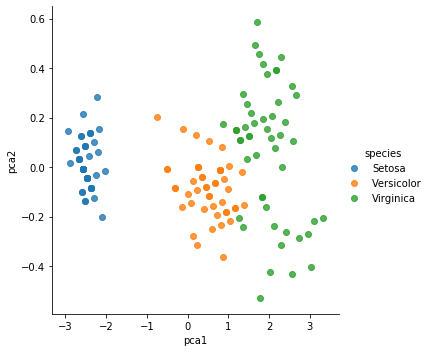

In [72]:
# instantiate pca object with 2 output dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# fit and transform using 2 input dimensions
out_pca = pca.fit_transform(df[['petal.length', 'petal.width']])

# create pca output dataframe and add label column "species"
df_pca = pd.DataFrame(data = out_pca, columns = ['pca1', 'pca2'])
df_pca = pd.concat([df_pca, df[['species']]], axis = 1)

# plot scatter of pca data
sns.lmplot(x='pca1', y='pca2', hue='species', data=df_pca, fit_reg=False)

In [73]:
# get variance explained by each component
print(pca.explained_variance_ratio_)

[0.99025066 0.00974934]


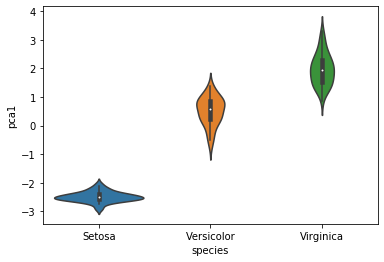

In [74]:
sns.violinplot(x='species', y='pca1', data=df_pca)

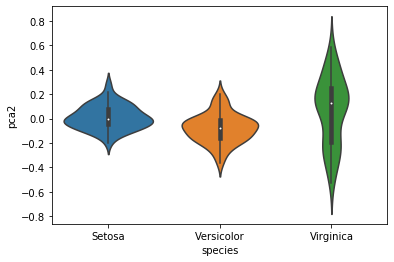

In [75]:
sns.violinplot(x='species', y='pca2', data=df_pca)

- LDA(Linear Discrimant Analysis)
    - 각 목적변수 값 별 속성들이 멀어지게
    - 각 목적변수 값의 속성들의 분산 최소화

In [76]:
# instantiate lda object with 2 output dimensions
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

# fit and transform using 2 input dimensions
cols = ['sepal.length', 'sepal.width']
lda.fit(df[cols], df['species'])
out_lda = lda.transform(df[cols])

# create lda output dataframe and add label column "species"
df_lda = pd.DataFrame(data = out_lda, columns = ['lda1', 'lda2'])
df_lda = pd.concat([df_lda, df[['species']]], axis = 1)

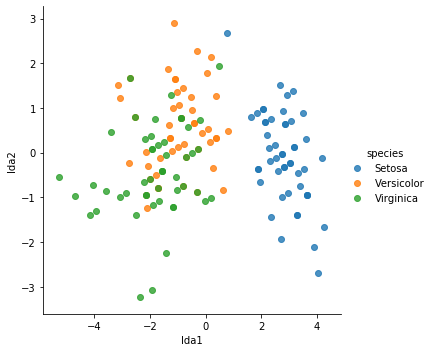

In [77]:
sns.lmplot(x="lda1", y="lda2", hue="species", data=df_lda, fit_reg=False)

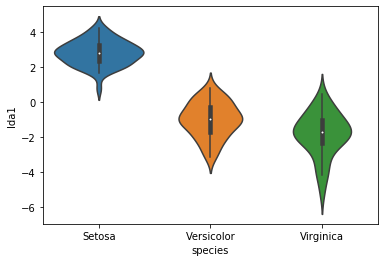

In [78]:
sns.violinplot(x='species',  y='lda1', data=df_lda)

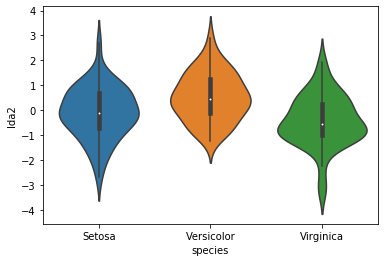

In [82]:
sns.violinplot(x='species', y='lda2', data=df_lda)

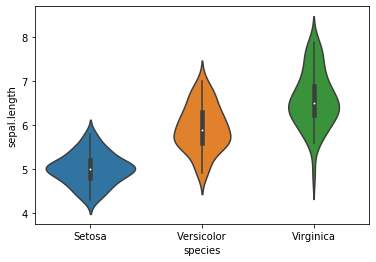

In [83]:
sns.violinplot(x='species', y='sepal.length', data=df)

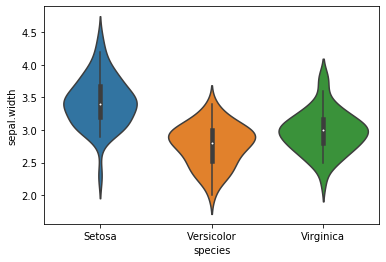

In [81]:
sns.violinplot(x='species', y='sepal.width', data=df)